In [1]:
##import some basic library
import pandas as pd ##for data read
import numpy as np  ##for some mathametical calculations
## for plot graph or graphical reprsentation
import matplotlib.pyplot as plt
import seaborn as sns 

##for display all columns of dataset

pd.pandas.set_option('display.max_columns',None)
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from  sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pickle

In [2]:
## read data
data=pd.read_csv("train (2).csv")
test_data=pd.read_csv("test (1).csv")

## shape of data
data.shape

(1460, 81)

In [3]:
##printimg  data top 5 rows to see how our data is look like 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##there  are many missing value in our dataset so first we chak how many missing value are ther in our datasets
## 1> first we make list of columns  which have missing value

columns_have_missing_value=[column for column in data.columns if data[column].isnull().sum()>1]

## 2> now we print percentage of missing value column
for column in columns_have_missing_value:
    print(column,np.round(data[column].isnull().mean(),4),'%missing _value')
    
    d=data.copy()


LotFrontage 0.1774 %missing _value
Alley 0.9377 %missing _value
MasVnrType 0.0055 %missing _value
MasVnrArea 0.0055 %missing _value
BsmtQual 0.0253 %missing _value
BsmtCond 0.0253 %missing _value
BsmtExposure 0.026 %missing _value
BsmtFinType1 0.0253 %missing _value
BsmtFinType2 0.026 %missing _value
FireplaceQu 0.4726 %missing _value
GarageType 0.0555 %missing _value
GarageYrBlt 0.0555 %missing _value
GarageFinish 0.0555 %missing _value
GarageQual 0.0555 %missing _value
GarageCond 0.0555 %missing _value
PoolQC 0.9952 %missing _value
Fence 0.8075 %missing _value
MiscFeature 0.963 %missing _value


In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
d.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

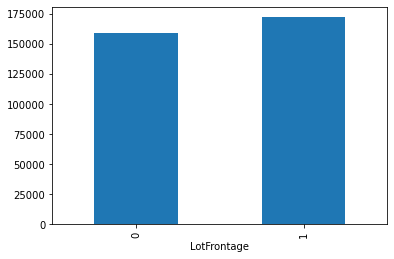

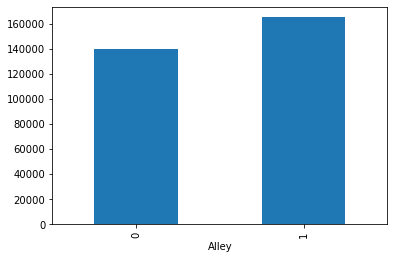

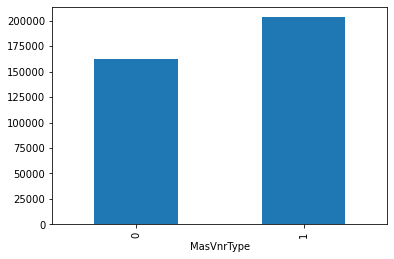

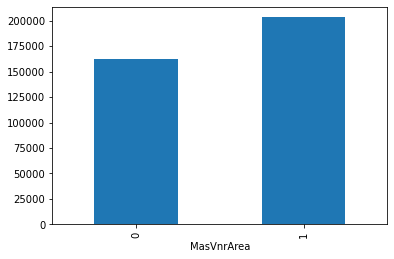

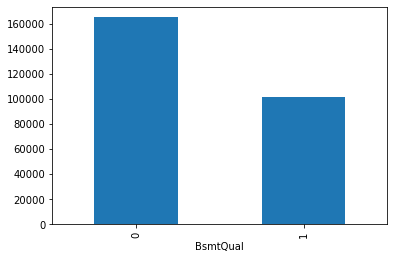

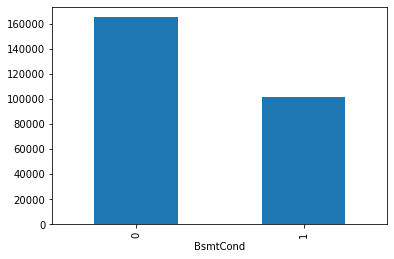

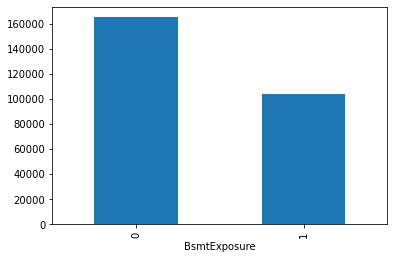

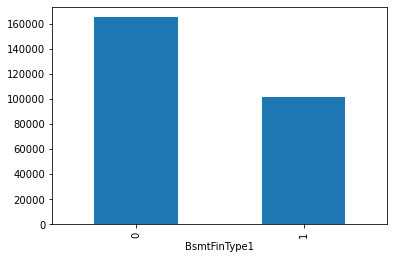

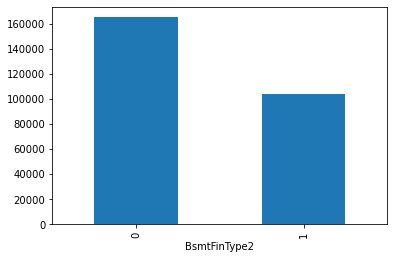

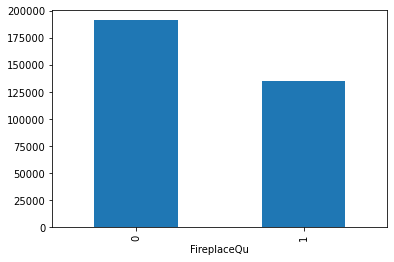

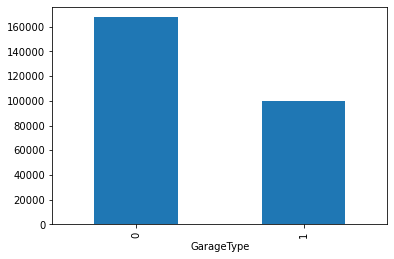

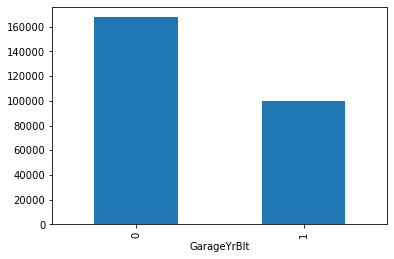

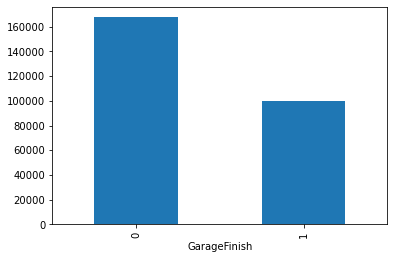

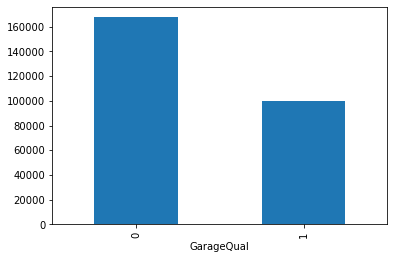

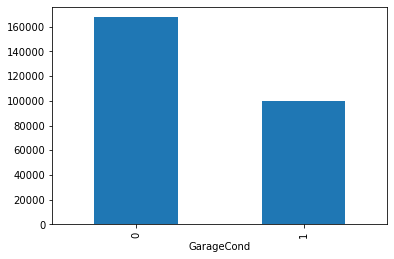

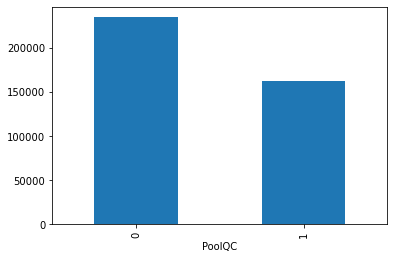

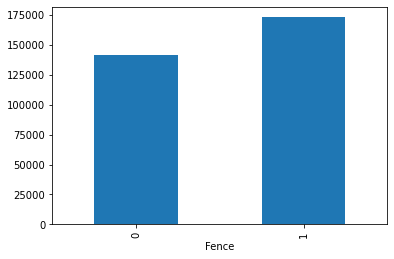

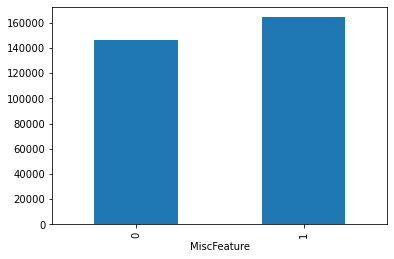

In [7]:
##here we plot a graph b/w missing value and sale price to find a relationship b/w them
for column in columns_have_missing_value:
    df=data.copy()
    
    df[column]=np.where(df[column].isnull(),1,0)
    df.groupby(column)['SalePrice'].median().plot.bar()
    plt.show()

## above we see the clearly relationship between sale price and missing columns so we replace these value with some meaningfull reprsentation

In [8]:
##now we see newmeric column in our dataset
numeric_columns= [column for column in data.columns if data[column].dtypes !='O']

print('numeric_Columns',len(numeric_columns))

##here we see our top 5 rows
data[numeric_columns].head()

numeric_Columns 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
##now here in neumeric column we see that there is many columns  which contain
##information regarding year so we  make a list of years columns
year_columns=[column for column in numeric_columns  if 'Yr' in column or 'Year' in column]
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'house sale')

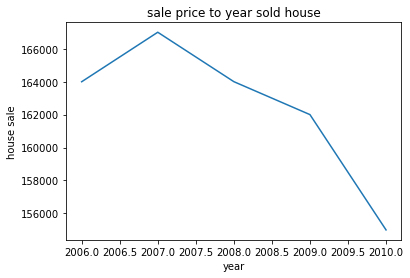

In [10]:
## now we cheak there is a relation ship between house sold in a year or sale price with graphical vizualization
data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('sale price to year sold house')
plt.xlabel('year')
plt.ylabel('house sale')

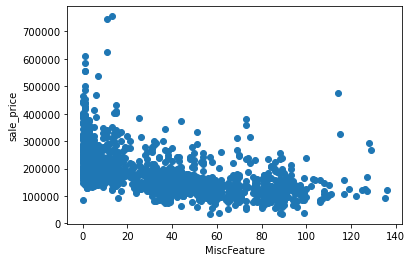

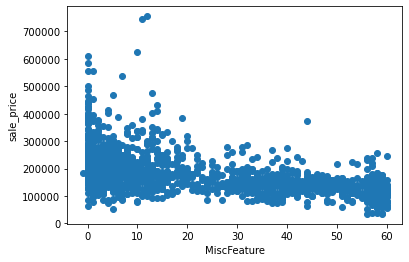

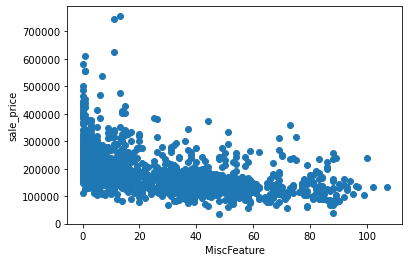

In [11]:
for c in year_columns:
    if c!='YrSold':
        data_co=data.copy()
        data_co[c]=data_co['YrSold']-data[c]
        plt.scatter(data_co[c],data_co['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('sale_price')
        plt.show()

In [12]:
## now we find that in this how many columns have discreate value and how many columns have continue value
discreate_value=[column for column in numeric_columns if len(data[column].unique())<25 and column not in year_columns+['Id'] ]
discreate_value

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
data[discreate_value]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


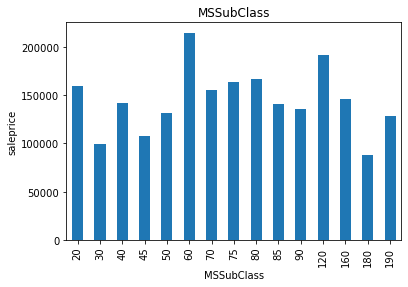

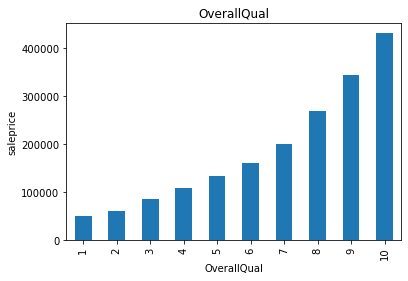

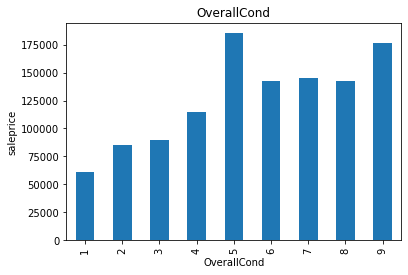

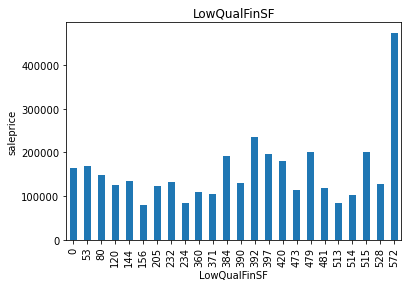

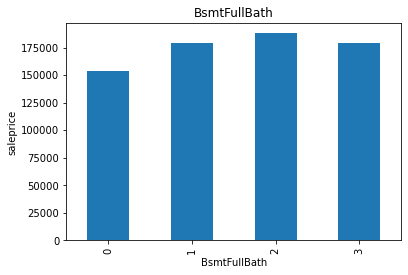

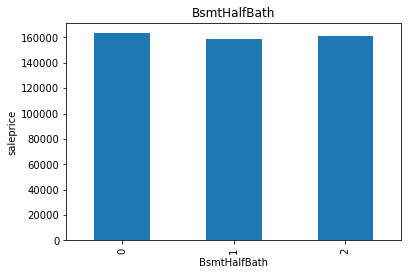

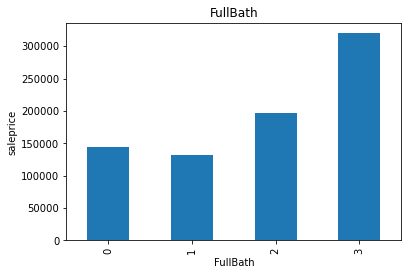

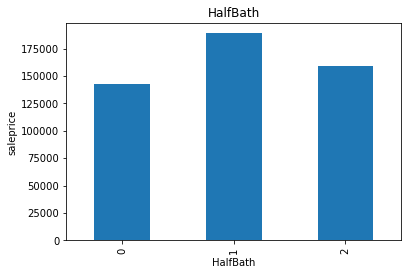

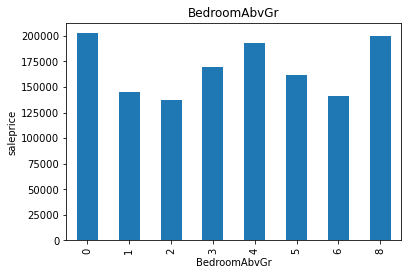

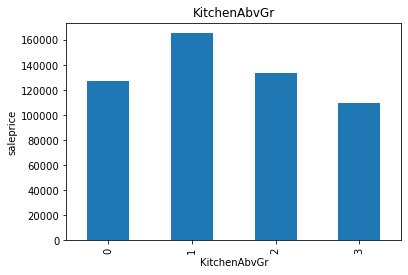

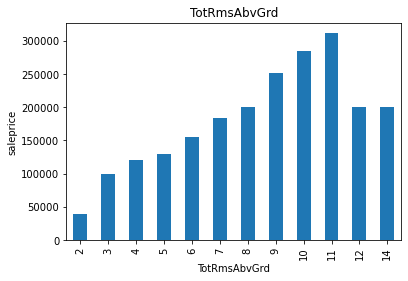

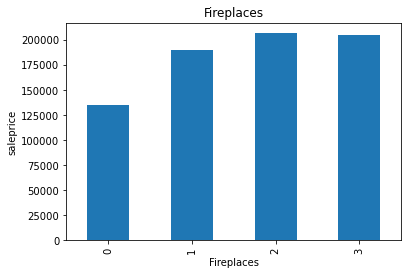

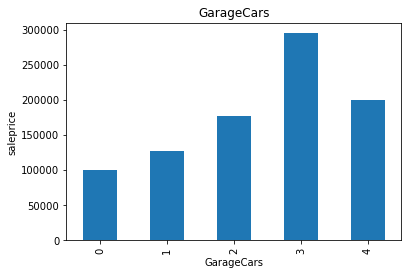

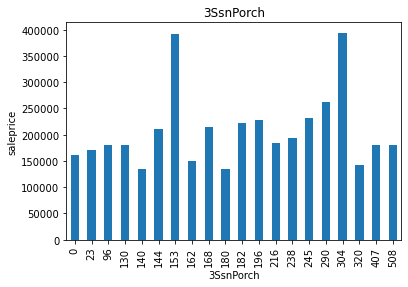

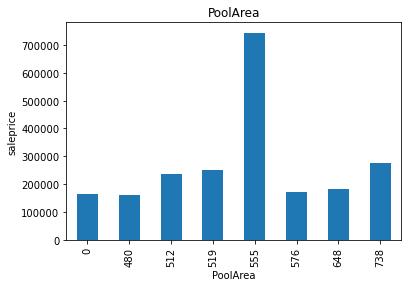

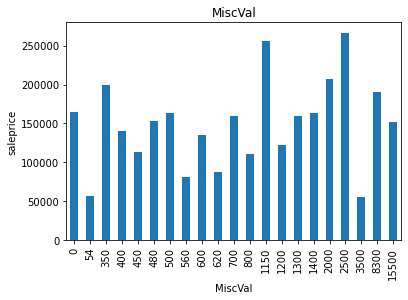

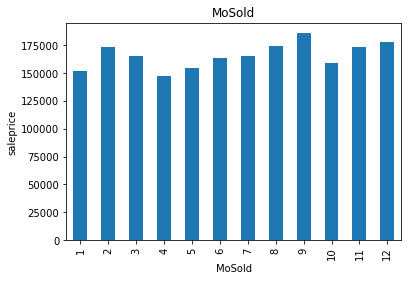

In [14]:
#now we finf=d the relationship b/w the discreate columns  and  sale price
for column in discreate_value:
    dd=data.copy()
    data.groupby(column)['SalePrice'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('saleprice')
    plt.title(column)
    plt.show()

In [15]:
## here we can continuos with continus values

continuous_value=[column for column in numeric_columns if column not in discreate_value+year_columns+['Id']]
print("Continuous value Count {}".format(len(continuous_value)))

Continuous value Count 16


In [16]:
continuous_value

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

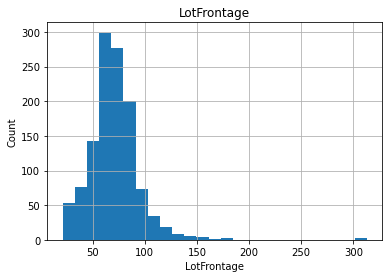

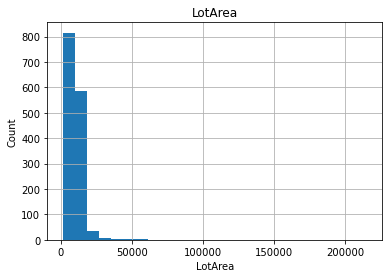

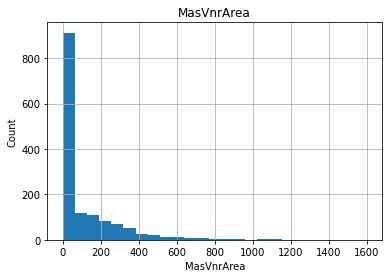

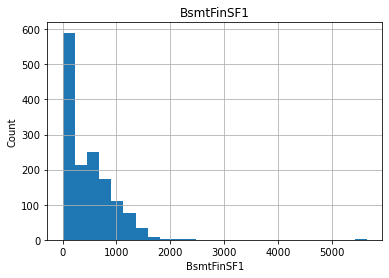

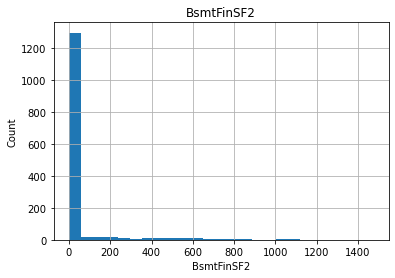

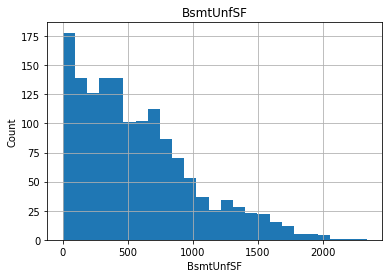

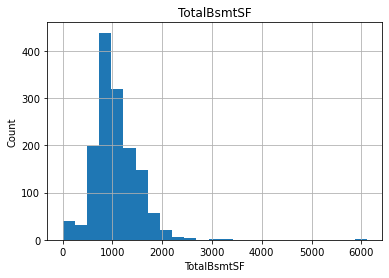

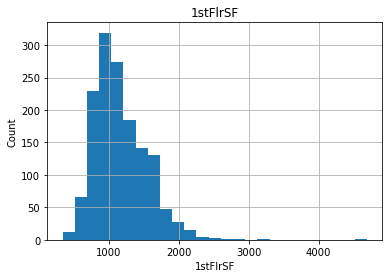

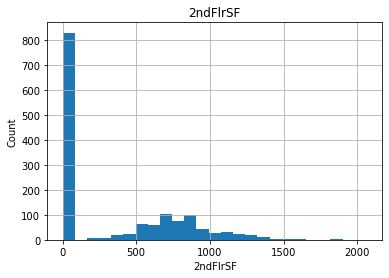

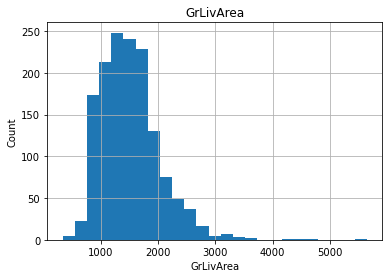

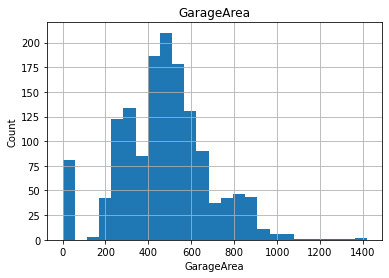

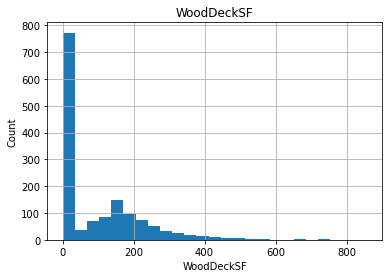

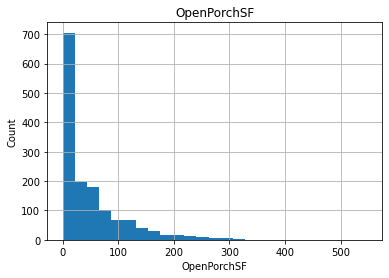

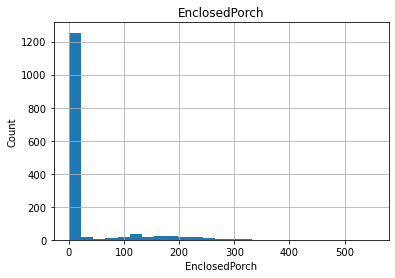

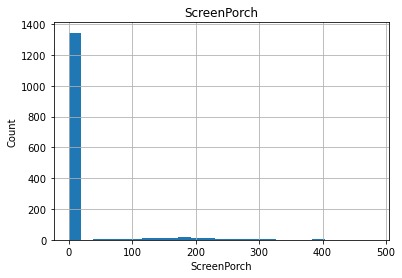

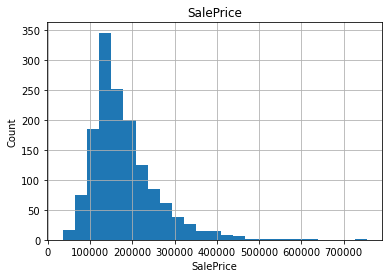

In [17]:
##let us see graphically continus value
for column in continuous_value:
    dataa=data.copy()
    dataa[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column)
    plt.show()


In [18]:
##now we fid categorical columns in our dataset
categorical_data=[column for column in data.columns if data[column].dtypes=='O']
categorical_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
data[categorical_data]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
for column in categorical_data:
    print('the column {} is {} category'.format(column,len(data[column].unique())))

the column MSZoning is 5 category
the column Street is 2 category
the column Alley is 3 category
the column LotShape is 4 category
the column LandContour is 4 category
the column Utilities is 2 category
the column LotConfig is 5 category
the column LandSlope is 3 category
the column Neighborhood is 25 category
the column Condition1 is 9 category
the column Condition2 is 8 category
the column BldgType is 5 category
the column HouseStyle is 8 category
the column RoofStyle is 6 category
the column RoofMatl is 8 category
the column Exterior1st is 15 category
the column Exterior2nd is 16 category
the column MasVnrType is 5 category
the column ExterQual is 4 category
the column ExterCond is 5 category
the column Foundation is 6 category
the column BsmtQual is 5 category
the column BsmtCond is 5 category
the column BsmtExposure is 5 category
the column BsmtFinType1 is 7 category
the column BsmtFinType2 is 7 category
the column Heating is 6 category
the column HeatingQC is 5 category
the colum

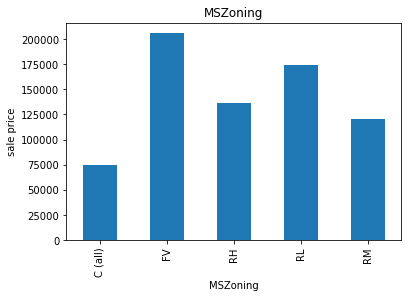

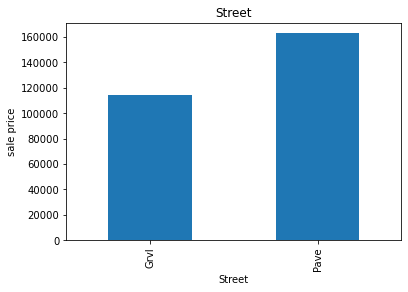

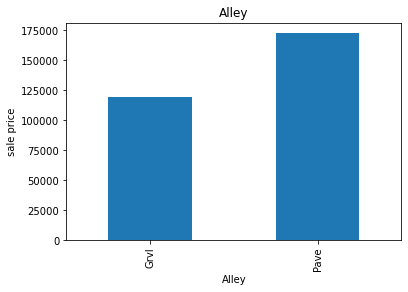

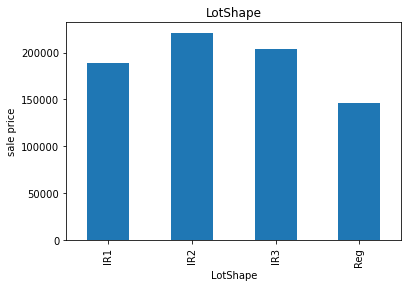

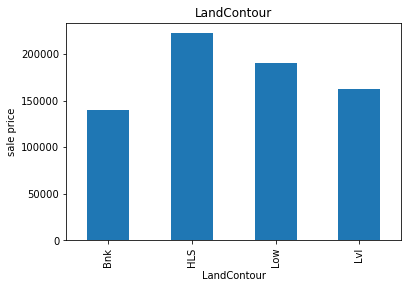

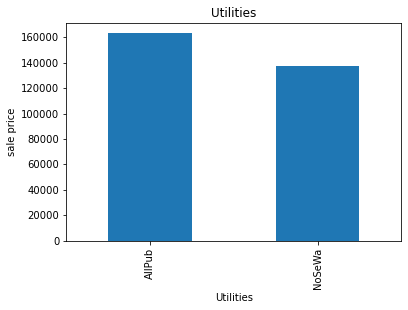

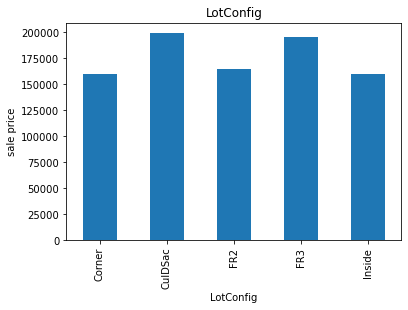

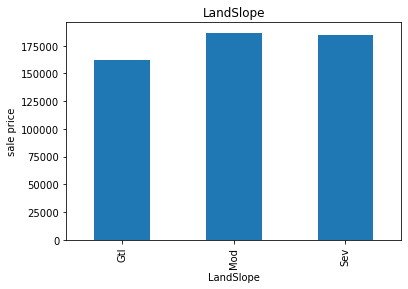

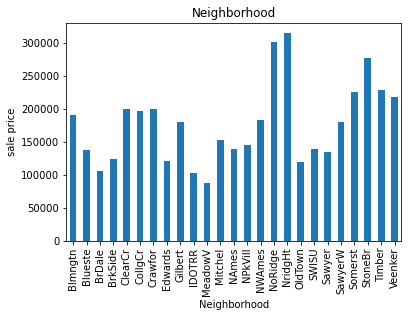

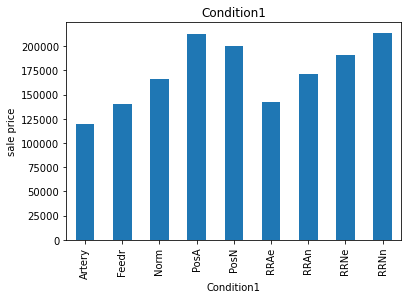

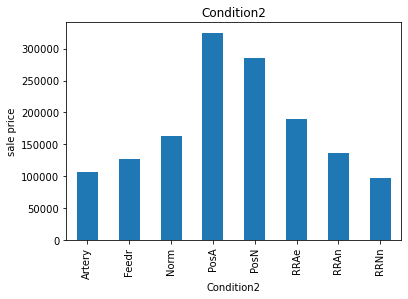

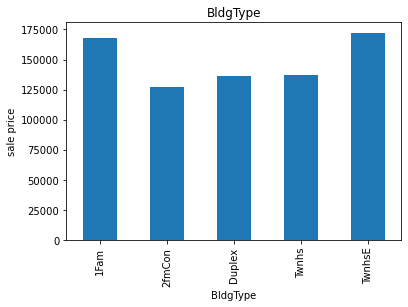

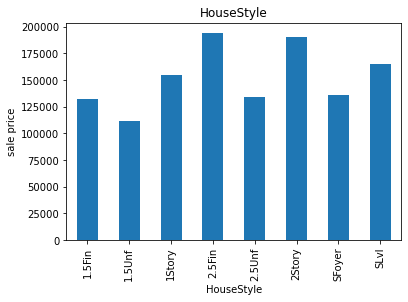

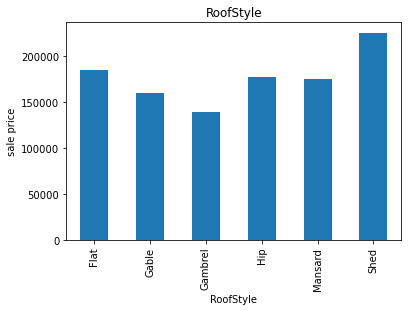

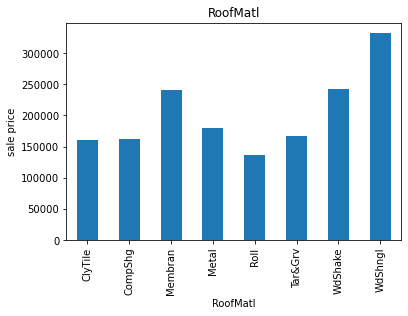

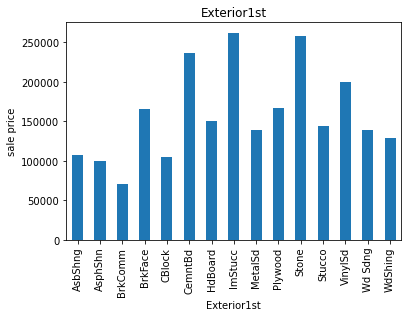

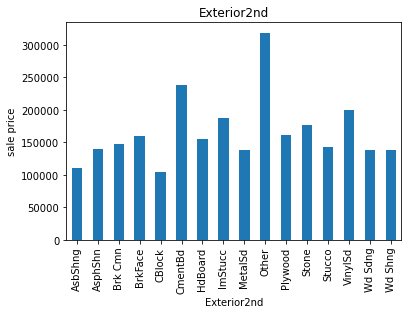

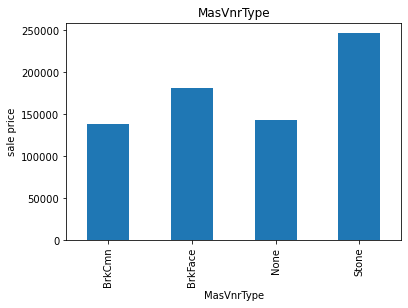

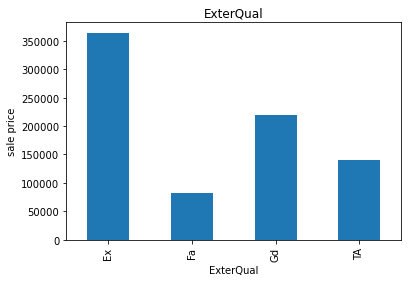

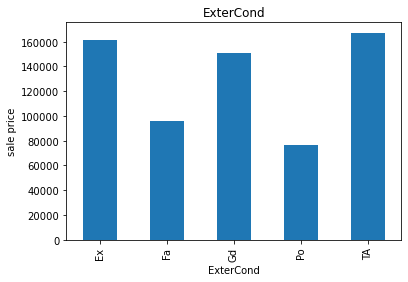

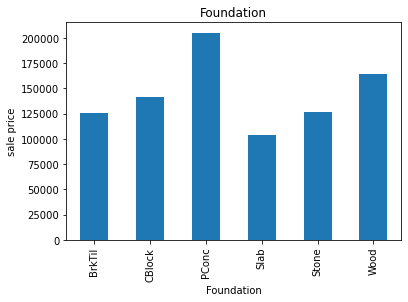

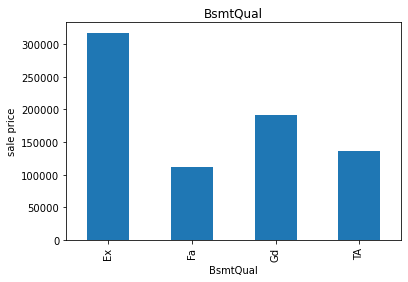

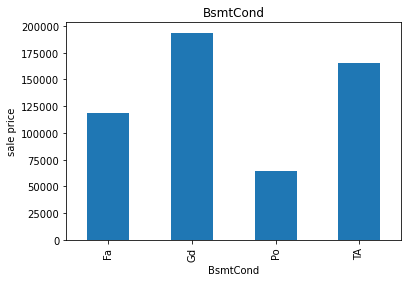

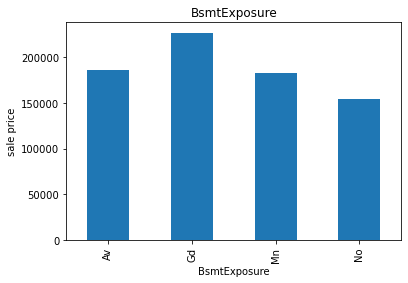

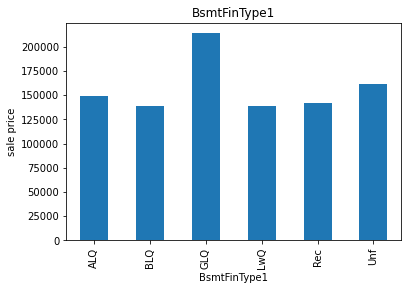

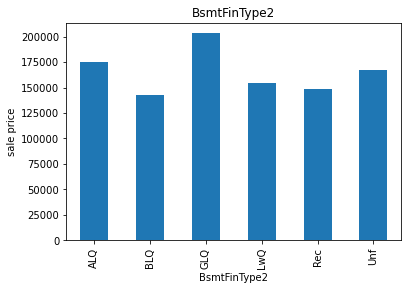

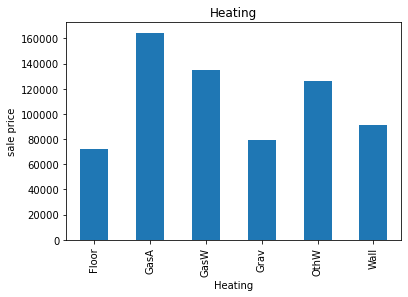

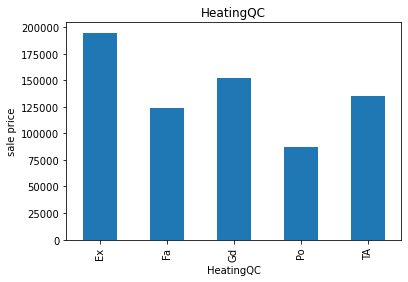

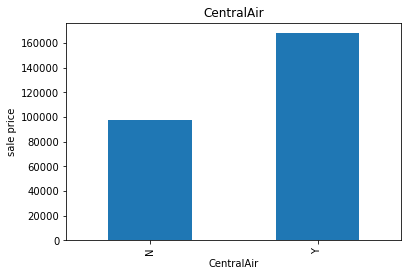

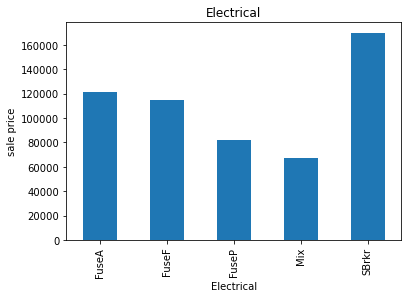

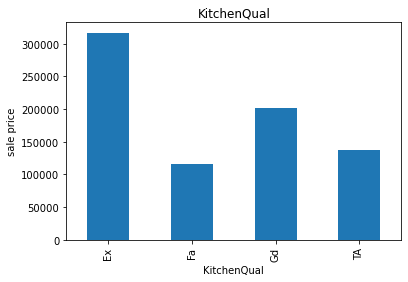

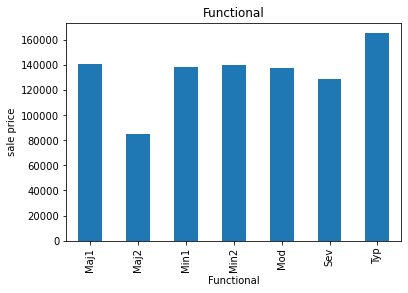

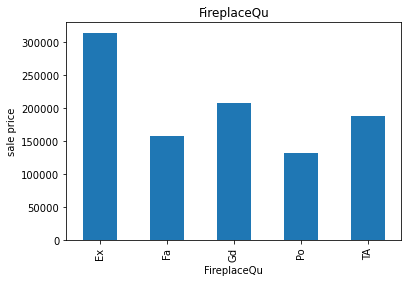

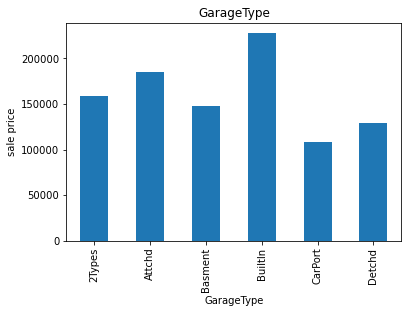

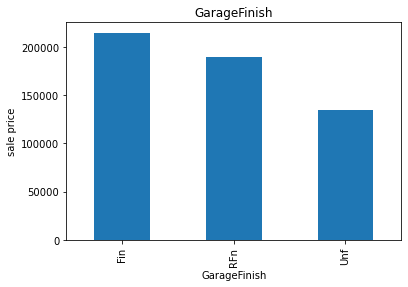

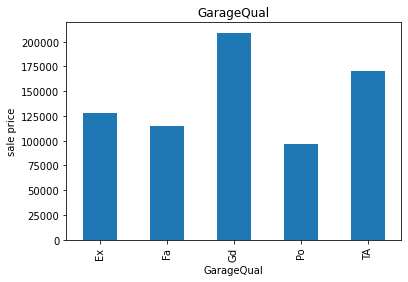

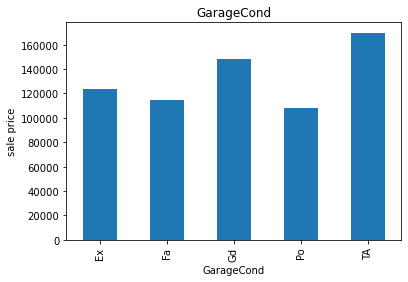

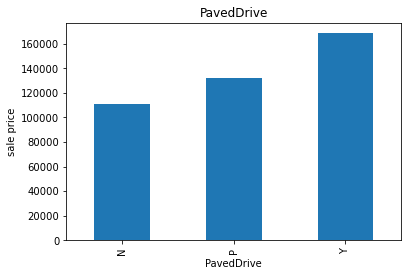

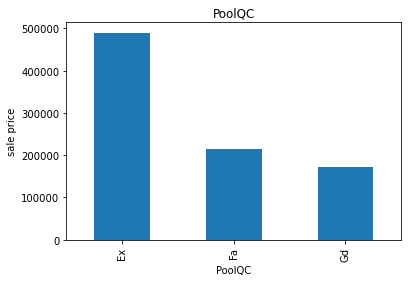

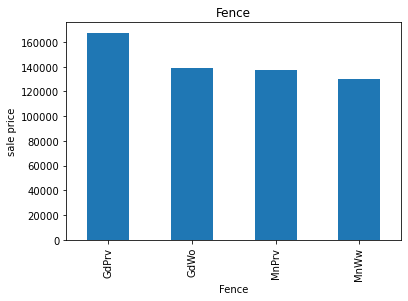

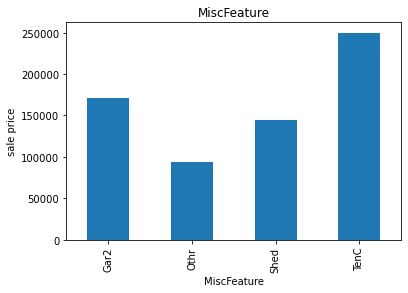

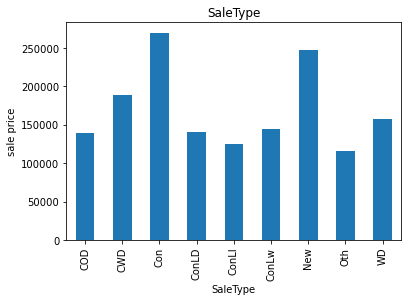

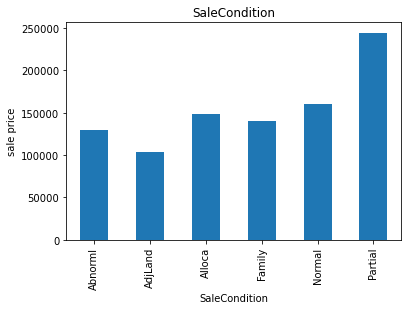

In [21]:
##now we see a relationshib b/w categorical features and sold price of data 
for column in categorical_data:
    data_c=data.copy()
    data.groupby(column)['SalePrice'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('sale price')
    plt.title(column)
    plt.show()

In [22]:
## now we do some pre processing for our data set 
##now we cheak  missing value  in numerical column
numerical_column_with_na_value=[column for column in data.columns if data[column].isnull().sum()>1 and data[column].dtypes !='O']
numerical_column_with_na_value

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [23]:
##fill missing value

for feature in numerical_column_with_na_value:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_column_with_na_value].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
data[columns_have_missing_value]=data[columns_have_missing_value].fillna('missing')
data[columns_have_missing_value]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,missing,BrkFace,196.0,Gd,TA,No,GLQ,Unf,missing,Attchd,2003.0,RFn,TA,TA,missing,missing,missing
1,80.0,missing,None,0.0,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA,missing,missing,missing
2,68.0,missing,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA,missing,missing,missing
3,60.0,missing,None,0.0,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA,missing,missing,missing
4,84.0,missing,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,missing,None,0.0,Gd,TA,No,Unf,Unf,TA,Attchd,1999.0,RFn,TA,TA,missing,missing,missing
1456,85.0,missing,Stone,119.0,Gd,TA,No,ALQ,Rec,TA,Attchd,1978.0,Unf,TA,TA,missing,MnPrv,missing
1457,66.0,missing,None,0.0,TA,Gd,No,GLQ,Unf,Gd,Attchd,1941.0,RFn,TA,TA,missing,GdPrv,Shed
1458,68.0,missing,None,0.0,TA,TA,Mn,GLQ,Rec,missing,Attchd,1950.0,Unf,TA,TA,missing,missing,missing


In [25]:
## all columns which have categorical value 
categorical_new_data=[column for column in data.columns if data[column].dtypes=='O']
categorical_new_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [27]:
##here our all data of categorical columns
data[categorical_new_data]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,missing,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
4,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1456,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,missing,MnPrv,missing,WD,Normal
1457,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,missing,Attchd,Unf,TA,TA,Y,missing,missing,missing,WD,Normal


In [28]:
##here we do label encodeing of our categorical columns 
for column in data[categorical_new_data].columns:
    
    data[column].replace(to_replace=list(data[column].unique()),value=list(range(0,len(data[column].unique()))),inplace=True)

In [29]:
x=data.drop(columns=['Id','SalePrice'])
y=data['SalePrice']

In [30]:

commom_column=list(set(x.columns).union(set(test_data.columns)))
commom_column

['Fireplaces',
 'GarageYrBlt',
 'Condition1',
 'BldgType',
 'WoodDeckSF',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'Condition2',
 'RoofMatl',
 'OverallQual',
 'LotConfig',
 'Foundation',
 'ScreenPorch',
 '3SsnPorch',
 'BsmtFinSF2',
 'Utilities',
 'TotRmsAbvGrd',
 'RoofStyle',
 'BsmtFinType1',
 'LotFrontage',
 'YrSold',
 'BsmtExposure',
 'TotalBsmtSF',
 'GarageQual',
 'Street',
 'BsmtUnfSF',
 'SaleType',
 'MoSold',
 'KitchenAbvGr',
 'Neighborhood',
 'ExterQual',
 'Alley',
 'Exterior1st',
 'YearRemodAdd',
 'CentralAir',
 'GarageCars',
 'LandSlope',
 'LandContour',
 'ExterCond',
 'MasVnrType',
 'BsmtFinType2',
 'GrLivArea',
 'EnclosedPorch',
 'Exterior2nd',
 'OpenPorchSF',
 'BsmtHalfBath',
 'PoolArea',
 '2ndFlrSF',
 '1stFlrSF',
 'LotFrontagenan',
 'MasVnrAreanan',
 'BsmtCond',
 'GarageArea',
 'PavedDrive',
 'MiscVal',
 'LotArea',
 'BsmtFullBath',
 'PoolQC',
 'GarageYrBltnan',
 'MSZoning',
 'Functional',
 'BsmtQual',
 'FullBath',
 'GarageCond',
 'HalfBath',
 'MSSubClass',
 'LotShape',
 'Kitche

<AxesSubplot:>

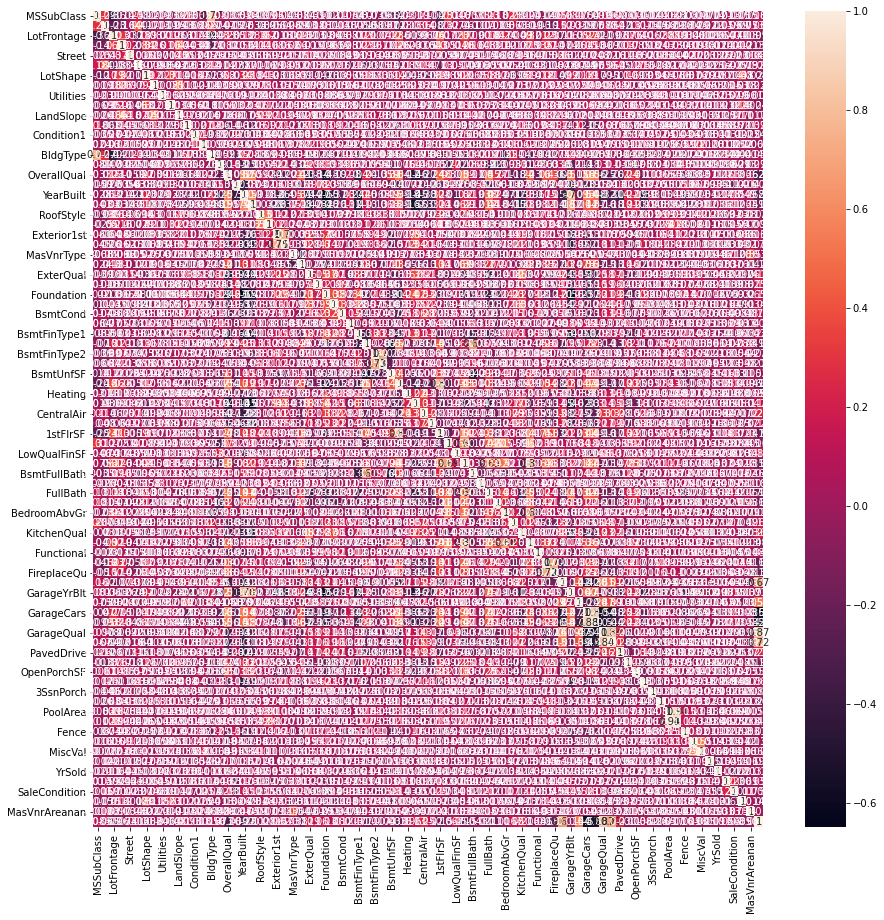

In [31]:
## herewe plot the heat map to see the highly coorelated feature but we cant see clearly beacuse of high columns
plt.figure(figsize=(15,15))
cor=x.corr()
sns.heatmap(cor,annot=True)

In [32]:
## with the following function we can select highly correlated features
## it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
highly_corelation_col=correlation(x,0.8)
highly_corelation_col

{'1stFlrSF',
 'GarageArea',
 'GarageCond',
 'GarageYrBltnan',
 'PoolQC',
 'TotRmsAbvGrd'}

In [34]:
##now we drop  highly corelations functions 
x=x.drop(highly_corelation_col,axis=1)

In [35]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,854,0,1710,1,0,2,1,3,1,0,0,0,0,0,2003.0,0,2,0,0,0,61,0,0,0,0,0,0,0,2,2008,0,0,0,0
1,20,0,80.0,9600,0,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,0,0,1262,0,1,2,0,3,1,1,0,1,1,0,1976.0,0,2,0,0,298,0,0,0,0,0,0,0,0,5,2007,0,0,0,0
2,60,0,68.0,11250,0,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,866,0,1786,1,0,2,1,3,1,0,0,1,1,0,2001.0,0,2,0,0,0,42,0,0,0,0,0,0,0,9,2008,0,0,0,0
3,70,0,60.0,9550,0,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,756,0,1717,1,0,1,0,3,1,0,0,1,2,1,1998.0,1,3,0,0,0,35,272,0,0,0,0,0,0,2,2006,0,1,0,0
4,60,0,84.0,14260,0,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1053,0,2198,1,0,2,1,4,1,0,0,1,1,0,2000.0,0,3,0,0,192,84,0,0,0,0,0,0,0,12,2008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,0,17,0,0,0,0,6,5,1999,2000,0,0,0,0,1,0.0,1,0,0,0,0,0,2,0,0,0,953,953,0,0,0,0,694,0,1647,0,0,2,1,3,1,1,0,1,1,0,1999.0,0,2,0,0,0,40,0,0,0,0,0,0,0,8,2007,0,0,0,0
1456,20,0,85.0,13175,0,0,0,0,0,0,0,6,0,0,0,1,6,6,1978,1988,0,0,7,4,2,119.0,1,0,1,0,0,0,1,790,4,163,589,1542,0,2,0,0,0,0,2073,1,0,2,0,3,1,1,1,2,1,0,1978.0,1,2,0,0,349,0,0,0,0,0,1,0,0,2,2010,0,0,0,0
1457,70,0,66.0,9042,0,0,0,0,0,0,0,2,0,0,0,0,7,9,1941,2006,0,0,6,6,1,0.0,2,1,5,1,1,0,0,275,0,0,877,1152,0,0,0,0,1152,0,2340,0,0,2,0,4,1,0,0,2,2,0,1941.0,0,1,0,0,0,60,0,0,0,0,3,1,2500,5,2010,0,0,0,0
1458,20,0,68.0,9717,0,0,0,0,0,0,0,11,0,0,0,1,5,6,1950,1996,1,0,1,1,1,0.0,1,0,1,1,0,2,0,49,4,1029,0,1078,0,1,0,2,0,0,1078,1,0,1,0,2,1,0,0,0,0,0,1950.0,1,1,0,0,366,0,112,0,0,0,0,0,0,4,2010,0,0,0,0


In [36]:
##now we remove the constant features from our dataset
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=1)
var_thres.fit(x)

VarianceThreshold(threshold=1)

In [37]:

var_thres.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False])

In [38]:
constant_columns = [column for column in data.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

47


In [39]:
##for cheaking best parameter 
'''scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
    lr=LinearRegression()
    pipe=make_pipeline(RandomForestRegressor(random_state=i))
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
print(scores[np.argmax(scores)])
print(scores[np.argmax(scores)])'''

'scores=[]\nfor i in range(100):\n    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)\n    lr=LinearRegression()\n    pipe=make_pipeline(RandomForestRegressor(random_state=i))\n    pipe.fit(X_train,y_train)\n    y_pred=pipe.predict(X_test)\n    scores.append(r2_score(y_test,y_pred))\nprint(scores[np.argmax(scores)])\nprint(scores[np.argmax(scores)])'

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)

In [41]:

le=LinearRegression()
le_fit=le.fit(x_train,y_train)
le_predict=le_fit.predict(x_test)
le.score(x_test,y_test)

0.8840170092489159

In [42]:

dt=DecisionTreeRegressor()
dt_fit=dt.fit(x_train,y_train)
dt_predict=dt_fit.predict(x_test)
dt.score(x_test,y_test)

0.7331771423032655

In [43]:

xg=XGBRFRegressor()
xg_fit=xg.fit(x_train,y_train)
xg_predict=xg_fit.predict(x_test)
xg.score(x_test,y_test)

0.9091982854661493

In [47]:

rf=RandomForestRegressor(random_state=98)
rf_fit=rf.fit(x_train,y_train)
rf_predict=rf_fit.predict(x_test)
print( rf.score(x_test,y_test))
print( r2_score(rf_predict,y_test))

0.9227941735502351
0.9088134515555805
